# Exchange Rate British Pound \ US$

In [203]:
#import library 
import pandas as pd
import numpy as np
import matplotlib as plot
import matplotlib.pyplot as plt

In [204]:
#get data
#def GetData(fileName):
    #return read_csv(fileName, header=0, parse_dates=[0], index_col=0)

In [205]:
#read time series from the exchange.csv file 
df = pd.read_csv('exchange.csv',  header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [206]:
#view top 10 records
df.head(10)

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96
1999-01-07,83.12
1999-01-08,82.37
1999-01-11,77.03
1999-01-12,83.44


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5100 entries, 1998-12-31 to 2018-07-18
Data columns (total 1 columns):
GBP/USD Close    5100 non-null float64
dtypes: float64(1)
memory usage: 79.7 KB


In [208]:
#view basic stats information on data
df.describe()

,GBP/USD Close
count,5100.000000
mean,89.732223
std,63.037321
min,17.040000
25%,45.965000
50%,73.315500
75%,94.187500
max,250.280000


# Visualizing Exchange Rate Time Series Data

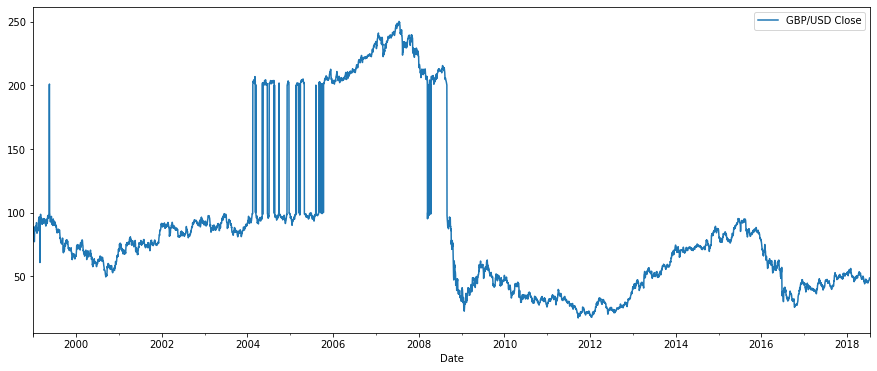

In [209]:
#plot the time series data
df.plot(figsize=(15, 6))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C7A9EF0>]],
      dtype=object)

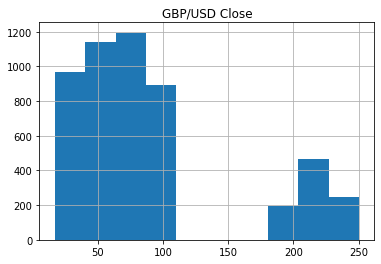

In [210]:
#Histogram
df.hist()

# ARIMA With StatsModels Package

In [211]:
from statsmodels.tsa.arima_model import ARIMA

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

#predict next value
predicted = StartARIMAForecasting(df, 1,1,0)

#display the value
print('Predicted=%f' % (predicted))

C:\Users\mrspider\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
C:\Users\mrspider\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


Predicted=47.557704


# ARIMA In Python To Forecast Exchange Rates

In [76]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0).values

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction
    
#Get exchange rates
ActualData = GetData('exchange.csv')
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    ActualValue =  TestData[timepoint]
    
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 3,1,0)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)


C:\Users\mrspider\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [73]:
#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

Test Mean Squared Error (smaller the better fit): 1.551


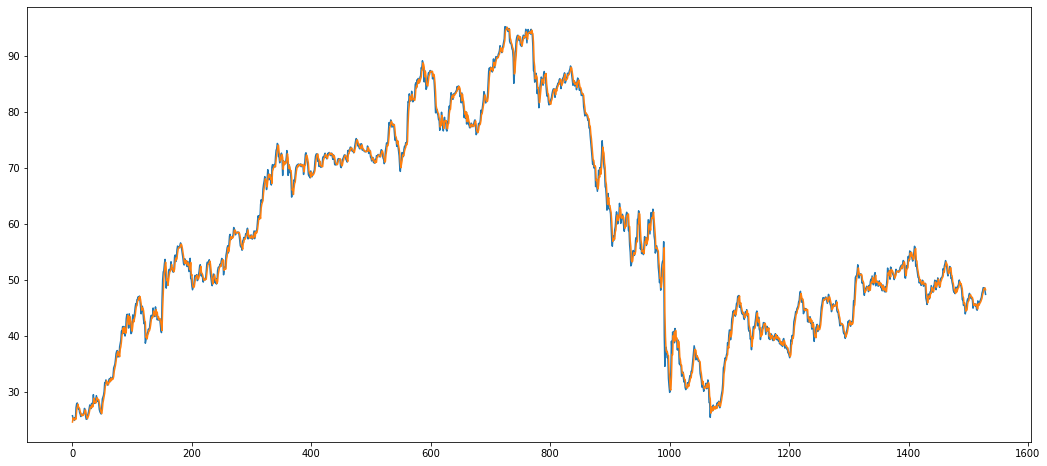

In [75]:
# plot
plt.plot(TestData)
plt.plot(Predictions)
plt.show()

# Implementing Moving Average on Exchange Rate Data
Simple Moving Average (SMA)

In [77]:
import numpy as pd
import pandas as pd

In [79]:
df2 = pd.read_csv('exchange.csv')

In [80]:
df2.head()

,Date,GBP/USD Close
0,1998-12-31,88.67
1,1999-01-01,88.67
2,1999-01-04,85.60
3,1999-01-05,83.95
4,1999-01-06,86.96


In [81]:
#calculate SMA for a window size of 3
for i in range(0,df.shape[0]-2):
    df2.loc[df2.index[i+2],'SMA_3'] = np.round(((df2.iloc[i,1]+ df2.iloc[i+1,1] +df2.iloc[i+2,1])/3),1)

In [82]:
df2.head()

,Date,GBP/USD Close,SMA_3
0,1998-12-31,88.67,NaN
1,1999-01-01,88.67,NaN
2,1999-01-04,85.60,87.6
3,1999-01-05,83.95,86.1
4,1999-01-06,86.96,85.5


For a sanity check, let's also use the pandas in-built rolling function and
see if it matches with our custom python based simple moving average.

In [83]:
df2['pandas_SMA_3'] = df2.iloc[:,1].rolling(window=3).mean()

In [84]:
df2.head()  #means your implementation of SMA was correct.

,Date,GBP/USD Close,SMA_3,pandas_SMA_3
0,1998-12-31,88.67,NaN,NaN
1,1999-01-01,88.67,NaN,NaN
2,1999-01-04,85.60,87.6,87.646667
3,1999-01-05,83.95,86.1,86.073333
4,1999-01-06,86.96,85.5,85.503333


calculate the simple moving average for a window_size of 4.

In [85]:
for i in range(0,df.shape[0]-3):
    df2.loc[df2.index[i+3],'SMA_4'] = np.round(((df2.iloc[i,1]+ df2.iloc[i+1,1] +df2.iloc[i+2,1]+df2.iloc[i+3,1])/4),1)

In [86]:
df2.head()

,Date,GBP/USD Close,SMA_3,pandas_SMA_3,SMA_4
0,1998-12-31,88.67,NaN,NaN,NaN
1,1999-01-01,88.67,NaN,NaN,NaN
2,1999-01-04,85.60,87.6,87.646667,NaN
3,1999-01-05,83.95,86.1,86.073333,86.7
4,1999-01-06,86.96,85.5,85.503333,86.3


In [87]:
df2['pandas_SMA_4'] = df2.iloc[:,1].rolling(window=4).mean()

In [88]:
df2.head()

,Date,GBP/USD Close,SMA_3,pandas_SMA_3,SMA_4,pandas_SMA_4
0,1998-12-31,88.67,NaN,NaN,NaN,NaN
1,1999-01-01,88.67,NaN,NaN,NaN,NaN
2,1999-01-04,85.60,87.6,87.646667,NaN,NaN
3,1999-01-05,83.95,86.1,86.073333,86.7,86.7225
4,1999-01-06,86.96,85.5,85.503333,86.3,86.2950


 plot the data of the moving averages that you calculated.

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

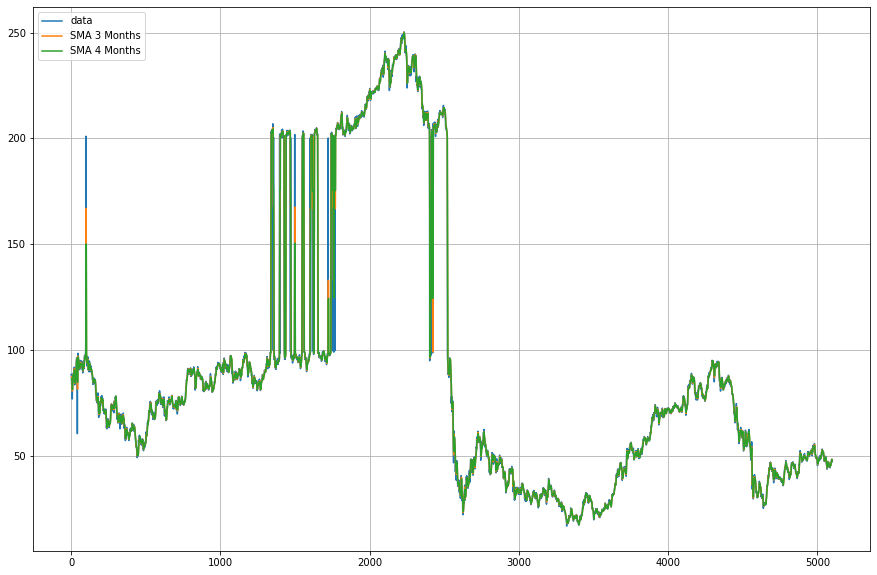

In [92]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df2['GBP/USD Close'],label='data')
plt.plot(df2['SMA_3'],label='SMA 3 Months')
plt.plot(df2['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)

Cumulative Moving Average

In [94]:
df3 = pd.read_csv('exchange.csv')

In [95]:
df3.head()

,Date,GBP/USD Close
0,1998-12-31,88.67
1,1999-01-01,88.67
2,1999-01-04,85.60
3,1999-01-05,83.95
4,1999-01-06,86.96


In [97]:
df3['CMA_4'] = df3.expanding(min_periods=4).mean()

In [98]:
df3.head()

,Date,GBP/USD Close,CMA_4
0,1998-12-31,88.67,NaN
1,1999-01-01,88.67,NaN
2,1999-01-04,85.60,NaN
3,1999-01-05,83.95,86.7225
4,1999-01-06,86.96,86.7700


 plot the actual GBP/USD Close and the cumulative moving average 

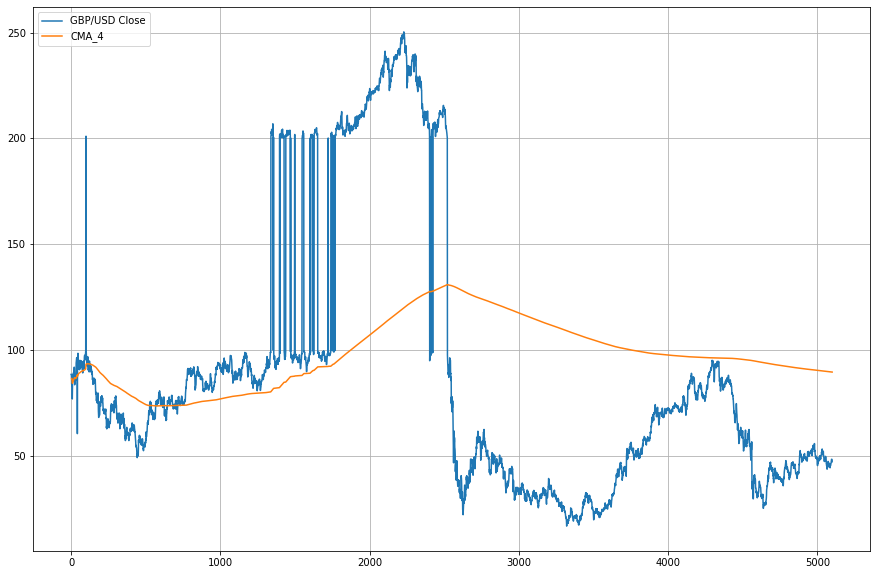

In [101]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df3['GBP/USD Close'],label='GBP/USD Close')
plt.plot(df3['CMA_4'],label='CMA_4')
plt.legend(loc=2)

Exponential Moving Average

In [103]:
df3['EMA'] = df3.iloc[:,1].ewm(span=40,adjust=False).mean()

In [104]:
df3.head()

,Date,GBP/USD Close,CMA_4,EMA
0,1998-12-31,88.67,NaN,88.670000
1,1999-01-01,88.67,NaN,88.670000
2,1999-01-04,85.60,NaN,88.520244
3,1999-01-05,83.95,86.7225,88.297305
4,1999-01-06,86.96,86.7700,88.232071


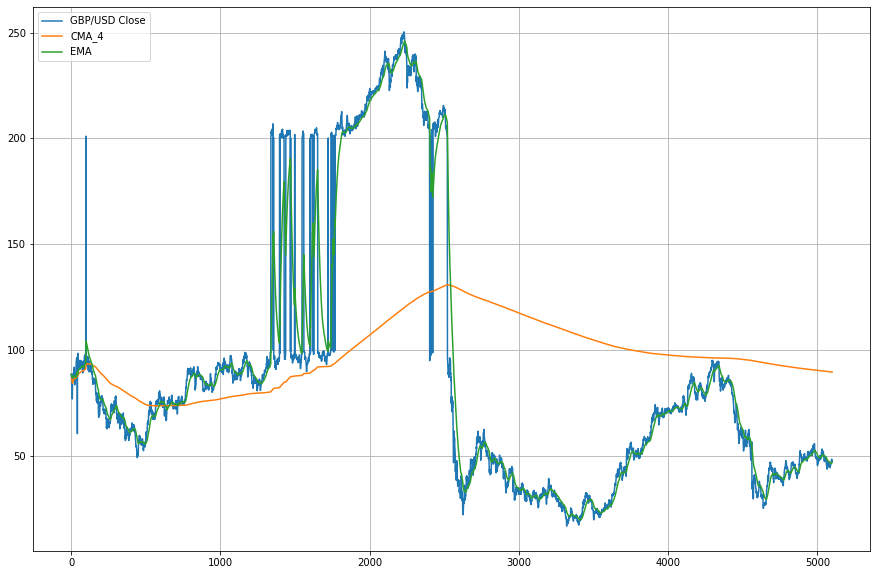

In [105]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df3['GBP/USD Close'],label='GBP/USD Close')
plt.plot(df3['CMA_4'],label='CMA_4')
plt.plot(df3['EMA'],label='EMA')
plt.legend(loc=2)

# Holt-Winters Exponential Smoothing in Python

In [190]:
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [191]:
df4 = read_csv('exchange.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [192]:
df4.head()

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96


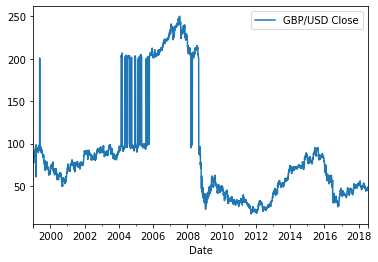

In [193]:
#plot the data
df4.plot()
plt.show()

In [194]:
#split between the training and the test data sets. The last 12 periods form the test data
df_train = df4.iloc[:-1000]
df_test = df4.iloc[-1000:]

In [195]:
#build and train the model on the training data
model = HWES(df_train, seasonal_periods=20, trend='add', seasonal='mul')
fitted = model.fit(optimized=True, use_brute=True)

C:\Users\mrspider\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


In [196]:
#print out the training summary
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 4100
Model:             ExponentialSmoothing   SSE                         438970.355
Optimized:                         True   AIC                          19209.124
Trend:                         Additive   BIC                          19360.774
Seasonal:                Multiplicative   AICC                         19209.469
Seasonal Periods:                    20   Date:                 Thu, 14 Jan 2021
Box-Cox:                          False   Time:                         21:35:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6507777                alpha                 True
smoothing_slope          

In [197]:
#create an out of sample forcast for the next 500 steps beyond the final data point in the training data set
Exchange_forecast = fitted.forecast(steps=1000)

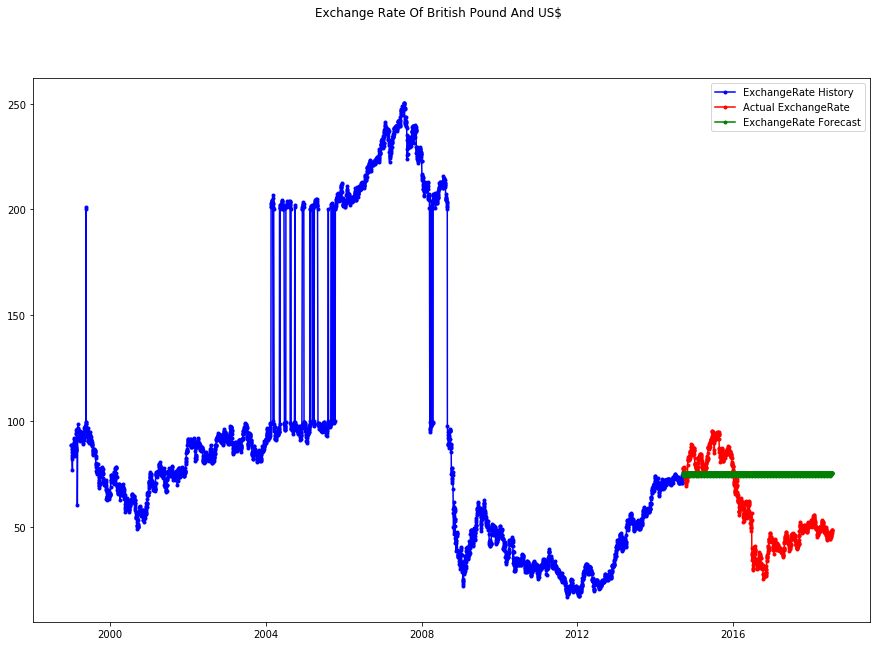

In [198]:
#plot the training data, the test data and the forecast on the same plot
fig = plt.figure(figsize=[15,10])
fig.suptitle('Exchange Rate Of British Pound And US$')
past, = plt.plot(df_train.index, df_train, 'b.-', label='ExchangeRate History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual ExchangeRate ')
predicted_future, = plt.plot(df_test.index, Exchange_forecast, 'g.-', label='ExchangeRate Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

<Figure size 1080x720 with 0 Axes>

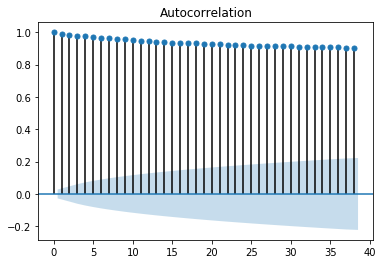

In [201]:
#Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=[15,10])
plot_acf(df4)
plt.show()

<Figure size 1080x720 with 0 Axes>

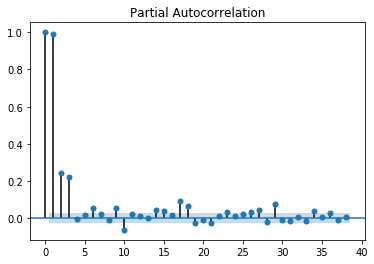

In [202]:
#plot PCAF
from statsmodels.graphics.tsaplots import plot_pacf
fig = plt.figure(figsize=[15,10])
plot_pacf(df4)
plt.show()